# PROJECT: TIME SERIES ANALYSIS OF NAICS

## We will be extracting, merging and appending data from various types of flat files to create a comprehensive dataset that we will use to answer various questions and gain insights with visualizations and graphs. 

### First, from a review of the flat files, there are key variables that will we be using:
### - NAICS - Industry code in 2,3 or 4 digits indicating industry hierachy
### - Industry Name - Specifies what the industry name the NAICS code indicates
### - Employment - Specifies the values of employment in an industry per month in each year from 1997 - 2018

#### We will be using the NAICS and Industry Name as primary keys to gather, extract, merge and append data into new or existing flat files.

In [1]:
#import
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [2]:
#read in flat files as data input
data_output = pd.read_excel("Data_Output.xlsx", sheet_name="Sheet1")

lmo_details = pd.read_excel("LMO_Detailed_Industries_by_NAICS_3.xlsx", sheet_name="LMO_Detailed_Industry")

In [3]:
#clean and fill NaNs with 0
data_output = data_output.fillna(0)

#create new column in data_output and set column dtype as str
data_output["NAICS"] = ""
lmo_details["NAICS"] = lmo_details["NAICS"].astype(str)

In [4]:
print(data_output.info())

print()

print(lmo_details.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15576 entries, 0 to 15575
Data columns (total 5 columns):
SYEAR                    15576 non-null int64
SMTH                     15576 non-null int64
LMO_Detailed_Industry    15576 non-null object
Employment               15576 non-null float64
NAICS                    15576 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 608.5+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 2 columns):
LMO_Detailed_Industry    46 non-null object
NAICS                    46 non-null object
dtypes: object(2)
memory usage: 816.0+ bytes
None


In [5]:
#get list of industries from data_output
data_output_lmo_industries = data_output["LMO_Detailed_Industry"].values

In [6]:
#get NAICS codes from lmo_details and append to exact row in data_output
for industry in data_output_lmo_industries:
    #checks if any of the rows of the series has a true value, if true, then set that row value with the NAICS code
    if(lmo_details["LMO_Detailed_Industry"].isin([industry]).any()):
        data_output.loc[data_output["LMO_Detailed_Industry"] == industry, ["NAICS"]] \
        = lmo_details.loc[lmo_details["LMO_Detailed_Industry"] == industry, ["NAICS"]].values

In [7]:
data_output.tail()

,SYEAR,SMTH,LMO_Detailed_Industry,Employment,NAICS
15571,2018,12,Utilities,0.0,22
15572,2018,12,Warehousing and storage,0.0,493
15573,2018,12,Water transportation,0.0,483
15574,2018,12,Wholesale trade,0.0,41
15575,2018,12,Wood product manufacturing,0.0,321


In [8]:
#list of RTRA Employment files from 1997 - 2018
rtrafiles = [
                [('RTRA_Employ_2NAICS_97_99.csv', 2), ('RTRA_Employ_3NAICS_97_99.csv', 3), ('RTRA_Employ_4NAICS_97_99.csv', 4)],
                [('RTRA_Employ_2NAICS_00_05.csv', 2), ('RTRA_Employ_3NAICS_00_05.csv', 3), ('RTRA_Employ_4NAICS_00_05.csv', 4)],
                [('RTRA_Employ_2NAICS_06_10.csv', 2), ('RTRA_Employ_3NAICS_06_10.csv', 3), ('RTRA_Employ_4NAICS_06_10.csv', 4)],
                [('RTRA_Employ_2NAICS_11_15.csv', 2), ('RTRA_Employ_3NAICS_11_15.csv', 3), ('RTRA_Employ_4NAICS_11_15.csv', 4)],
                [('RTRA_Employ_2NAICS_16_20.csv', 2), ('RTRA_Employ_3NAICS_16_20.csv', 3), ('RTRA_Employ_4NAICS_16_20.csv', 4)]
            ]

In [9]:
#convert Employment column of data_output to type int64
data_output["Employment"] = data_output["Employment"].astype(np.int64)

In [10]:
data_output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15576 entries, 0 to 15575
Data columns (total 5 columns):
SYEAR                    15576 non-null int64
SMTH                     15576 non-null int64
LMO_Detailed_Industry    15576 non-null object
Employment               15576 non-null int64
NAICS                    15576 non-null object
dtypes: int64(3), object(2)
memory usage: 608.5+ KB


In [11]:
#extract unique NAICS codes from the NAICS column of data_output
naics_codes = data_output["NAICS"].unique()

In [12]:
#extract unique YEAR valuesfrom the SYEAR column of data_output
syear = data_output["SYEAR"].unique()

In [13]:
for rtrafile in rtrafiles:
    for rtraYear, codeslen in rtrafile:
        rtra = pd.read_csv(rtraYear)

        rtra['NAICS'] = rtra['NAICS'].astype(str)

        codes = [len(x) == codeslen for x in naics_codes]

        codes = naics_codes[codes]

        for year in syear:
            for month in range(1, 13):
                for code in codes:
                    row = rtra[(rtra["NAICS"].str.contains(code)) & (rtra["SMTH"] == month) & (rtra["SYEAR"] == year)]

                    if(row.any().any()):
                        data_output.loc[((data_output['NAICS'] == code) & (data_output["SMTH"] == month) \
                                      & (data_output["SYEAR"] == year)), ["Employment"]] = row["_EMPLOYMENT_"].values[0]

# From the data we have generated after merging and appending data, we want to get insights and answer some questions

### 1. How has construction evolved overtime?

In [14]:
#slice the data_output DataFrame and extract rows for construction industry data
construction = data_output.loc[data_output["LMO_Detailed_Industry"] == "Construction"]

In [15]:
construction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264 entries, 9 to 15526
Data columns (total 5 columns):
SYEAR                    264 non-null int64
SMTH                     264 non-null int64
LMO_Detailed_Industry    264 non-null object
Employment               264 non-null int64
NAICS                    264 non-null object
dtypes: int64(3), object(2)
memory usage: 12.4+ KB


In [16]:
#Group construction industry employment data into years and get each year's sum
construction_employment_by_year = construction.groupby(['SYEAR'])["Employment"].sum()

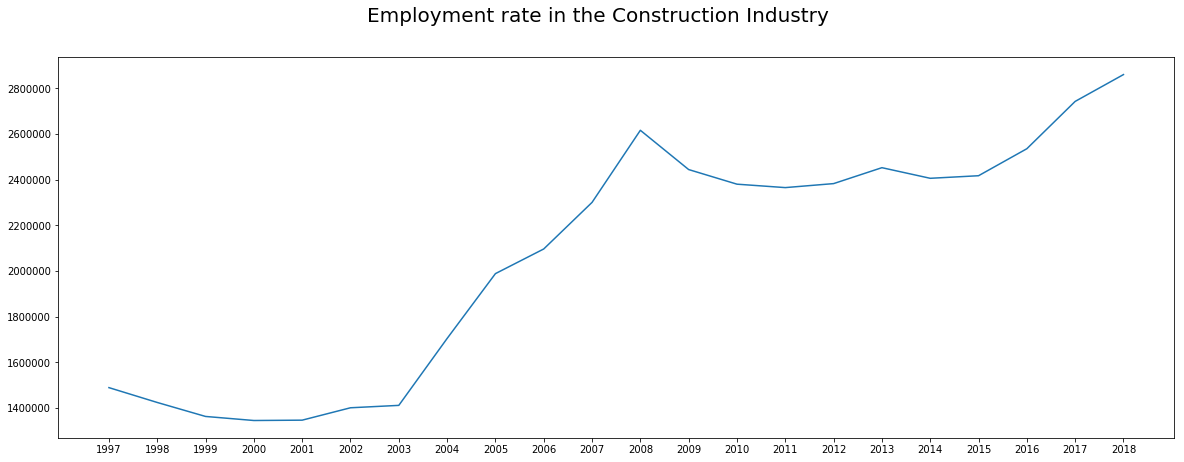

In [17]:
#plot employment rate across the years

fig1, ax1 = plt.subplots()
fig1.set_size_inches([20,7])
ax1.plot(construction_employment_by_year.index, construction_employment_by_year.values)
ax1.set_xticks(range(1997, 2019))
fig1.suptitle("Employment rate in the Construction Industry", fontsize=20)
plt.show()

### There has been significant growth in the construction industry, there was a peak in the growth rate from 2003. 

### 2. How employment in Construction evolved over time, compared to the total employment across all industries.

In [18]:
# Let us consider what the percentage of total employment in construction from 
# the sum total of employments in all industries

percentage = (construction["Employment"].sum() / data_output["Employment"].sum()) * 100
print(percentage)

11.566374741895782


**The percentage of total construction employments from 1997 - 2018 from the total number of employments in all industries (construction industry inclusive) is 11.56%**

### Let us see the growth rate of other industries (excluding the construction industry) in total, how has their growth rate been?

In [19]:
# Let us extract the data of other industries, excluding construction
other_industriesA = data_output.loc[np.invert(data_output["LMO_Detailed_Industry"] == "Construction")]

#Group other industries employment data into years and get each year's sum
other_industriesA_employment_by_year = other_industriesA.groupby(['SYEAR'])["Employment"].sum()

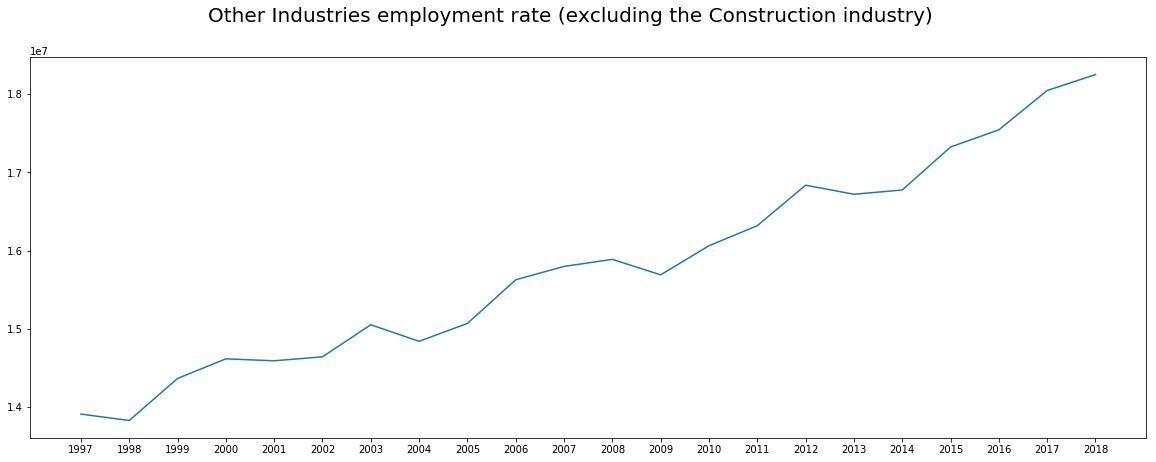

In [20]:
#plot other industries employment rate
fig2, ax2 = plt.subplots()
fig2.set_size_inches([20,7])

ax2.plot(other_industriesA_employment_by_year.index, other_industriesA_employment_by_year.values)
ax2.set_xticks(range(1997, 2019))
fig2.suptitle("Other Industries employment rate (excluding the Construction industry)", fontsize=20)
plt.show()

**We can clearly see that there have been significant growth in the employment rate of the these industries, just as like the construction industry**

### Let us compare the total employment rate of the industries against the construction industry

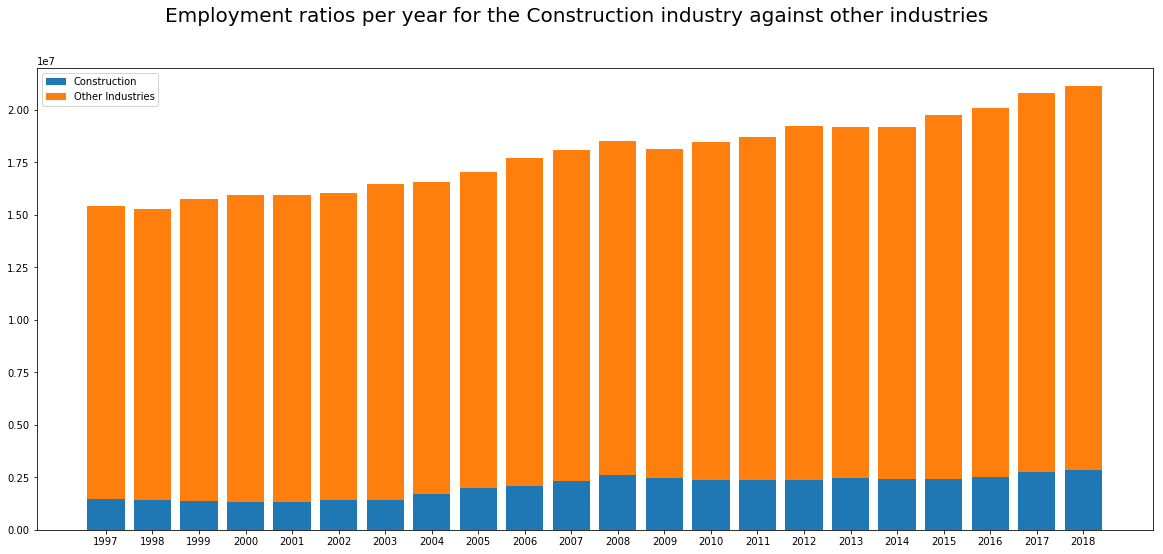

In [21]:
fig3, ax3 = plt.subplots()
fig3.set_size_inches([20,8.5])

ax3.bar(construction_employment_by_year.index, construction_employment_by_year.values, label="Construction")
ax3.bar(other_industriesA_employment_by_year.index, other_industriesA_employment_by_year.values, \
        bottom=construction_employment_by_year.values, label="Other Industries")

ax3.set_ylim([0, 22000000])
ax3.set_xticks(range(1997, 2019))

fig3.suptitle("Employment ratios per year for the Construction industry against other industries", fontsize=20)

plt.legend()

plt.show()

**The construction industry has a significant growth rate, compared to the total growth rate of the other industries, as they experience growth in the number of employment, the construction industry has also experienced a significant growth as well, and in the case where the total growth rate of the other companies, remain the same, the construction industry experienced significant increase, see year 2003 and 2004**

## 3. How has the employment of hospital staffs evolved over time?

In [22]:
#slice the data_output DataFrame and extract rows for Hospitals employment data
hospitals = data_output.loc[data_output["LMO_Detailed_Industry"] == "Hospitals"]

In [23]:
hospitals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264 entries, 21 to 15538
Data columns (total 5 columns):
SYEAR                    264 non-null int64
SMTH                     264 non-null int64
LMO_Detailed_Industry    264 non-null object
Employment               264 non-null int64
NAICS                    264 non-null object
dtypes: int64(3), object(2)
memory usage: 12.4+ KB


In [24]:
#Group Hospitals employment data into years and get each year's sum
hospitals_employment_by_year = hospitals.groupby(['SYEAR'])["Employment"].sum()

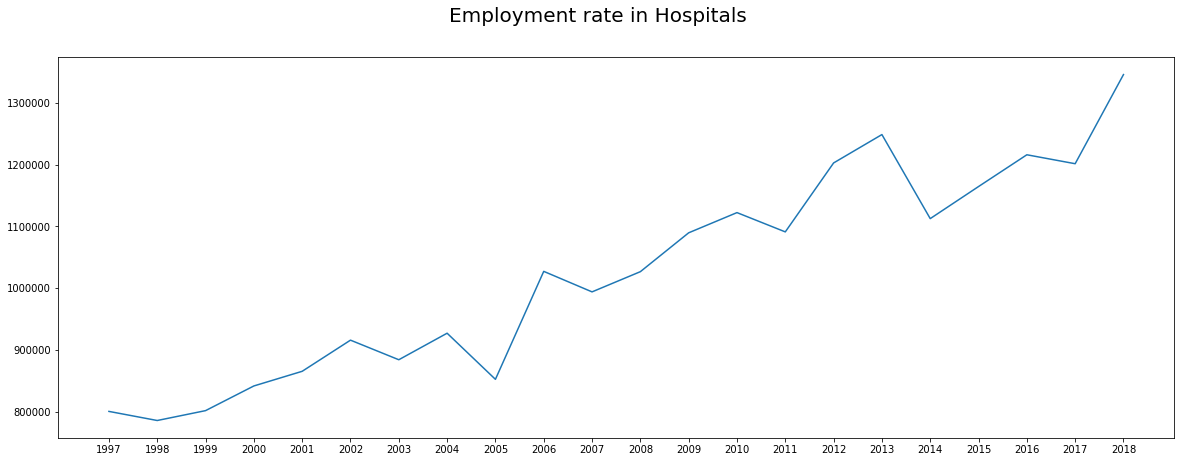

In [25]:
fig4, ax4 = plt.subplots()
fig4.set_size_inches([20,7])
ax4.plot(hospitals_employment_by_year.index, hospitals_employment_by_year.values)
ax4.set_xticks(range(1997, 2019))
fig4.suptitle("Employment rate in Hospitals", fontsize=20)
plt.show()

**The employment of Hospital staffs over the years have been erratic, with spikes in growth at various significant years, this could be as a result of government polices and availability of employable healthcare professionals and clerical officers. Though the growth trend has an upward motion**

### 4. How employment of Hospital staffs has evolved over time, compared to the total employment across all industries.

In [26]:
# Let us consider what the percentage of total employment of Hospital staffs from 
# the sum total of employments in all industries

percentage = (hospitals["Employment"].sum() / data_output["Employment"].sum()) * 100
print(percentage)

5.726162867576008


**The percentage of total employments of Hospitals staffs from 1997 - 2018 from the total number of employments in all industries (construction industry inclusive) is 5.73%**

In [27]:
# Let us extract the data of other industries, excluding construction
other_industriesB = data_output.loc[np.invert(data_output["LMO_Detailed_Industry"] == "Hospitals")]

other_industriesB_employment_by_year = other_industriesB.groupby(['SYEAR'])["Employment"].sum()

### Let us see the growth rate of other industries (excluding the Hospitals) in total, how has their growth rate been?

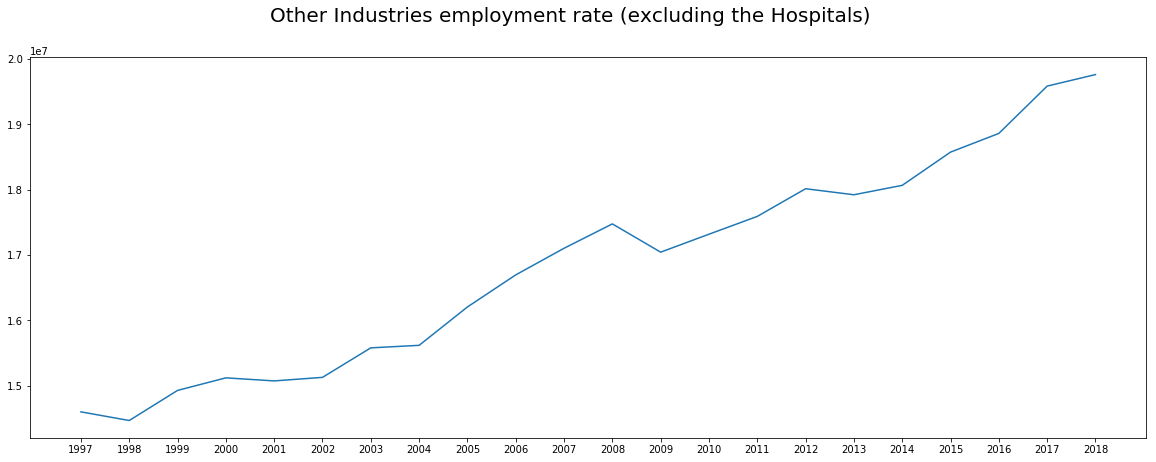

In [28]:
fig5, ax5 = plt.subplots()
fig5.set_size_inches([20,7])

ax5.plot(other_industriesB_employment_by_year.index, other_industriesB_employment_by_year.values)
ax5.set_xticks(range(1997, 2019))
fig5.suptitle("Other Industries employment rate (excluding the Hospitals)", fontsize=20)
plt.show()

**The growth rate of employment in Hospitals has significant growth just like as seen in the growth rate of industries (excluding the Construction industry)**

### Let us compare the total employment rate of the industries against that of the Hospitals

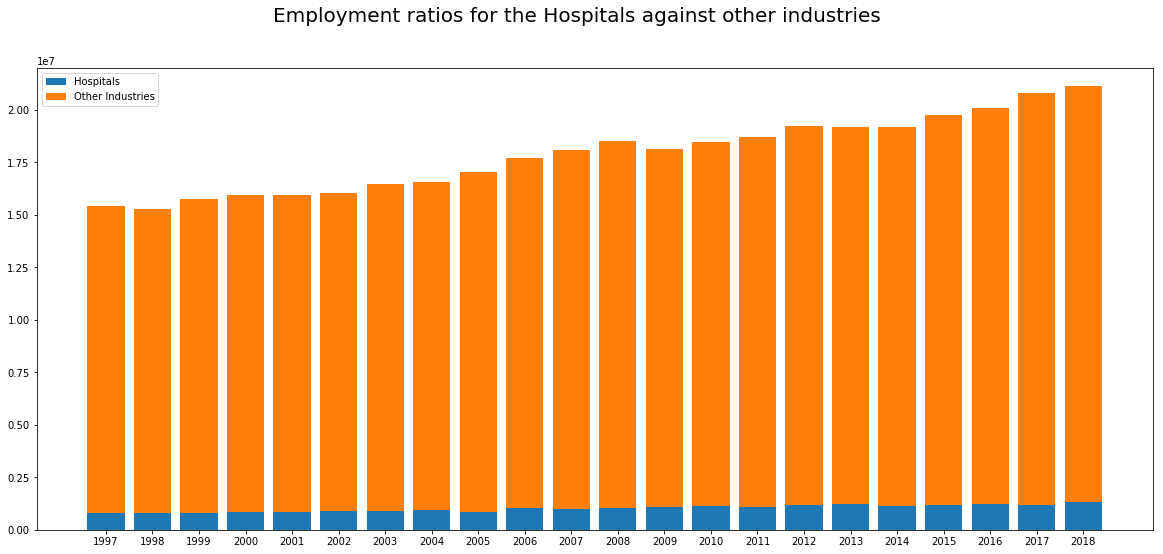

In [29]:
fig6, ax6 = plt.subplots()
fig6.set_size_inches([20,8.5])

ax6.bar(hospitals_employment_by_year.index, hospitals_employment_by_year.values, label="Hospitals")
ax6.bar(other_industriesB_employment_by_year.index, other_industriesB_employment_by_year.values, \
        bottom=hospitals_employment_by_year.values, label="Other Industries")

ax6.set_ylim([0, 22000000])
ax6.set_xticks(range(1997, 2019))

fig6.suptitle("Employment ratios for the Hospitals against other industries", fontsize=20)

plt.legend()

plt.show()

**Comparing how the employment of employment of hospital staffs over the years with the sum total of employments of other industries, the growth rate has slight increase, there has been relatively small growth compared to other industries.**

### 5. How has employment in the construction industry and that of Hospital staffs evolved over time? 

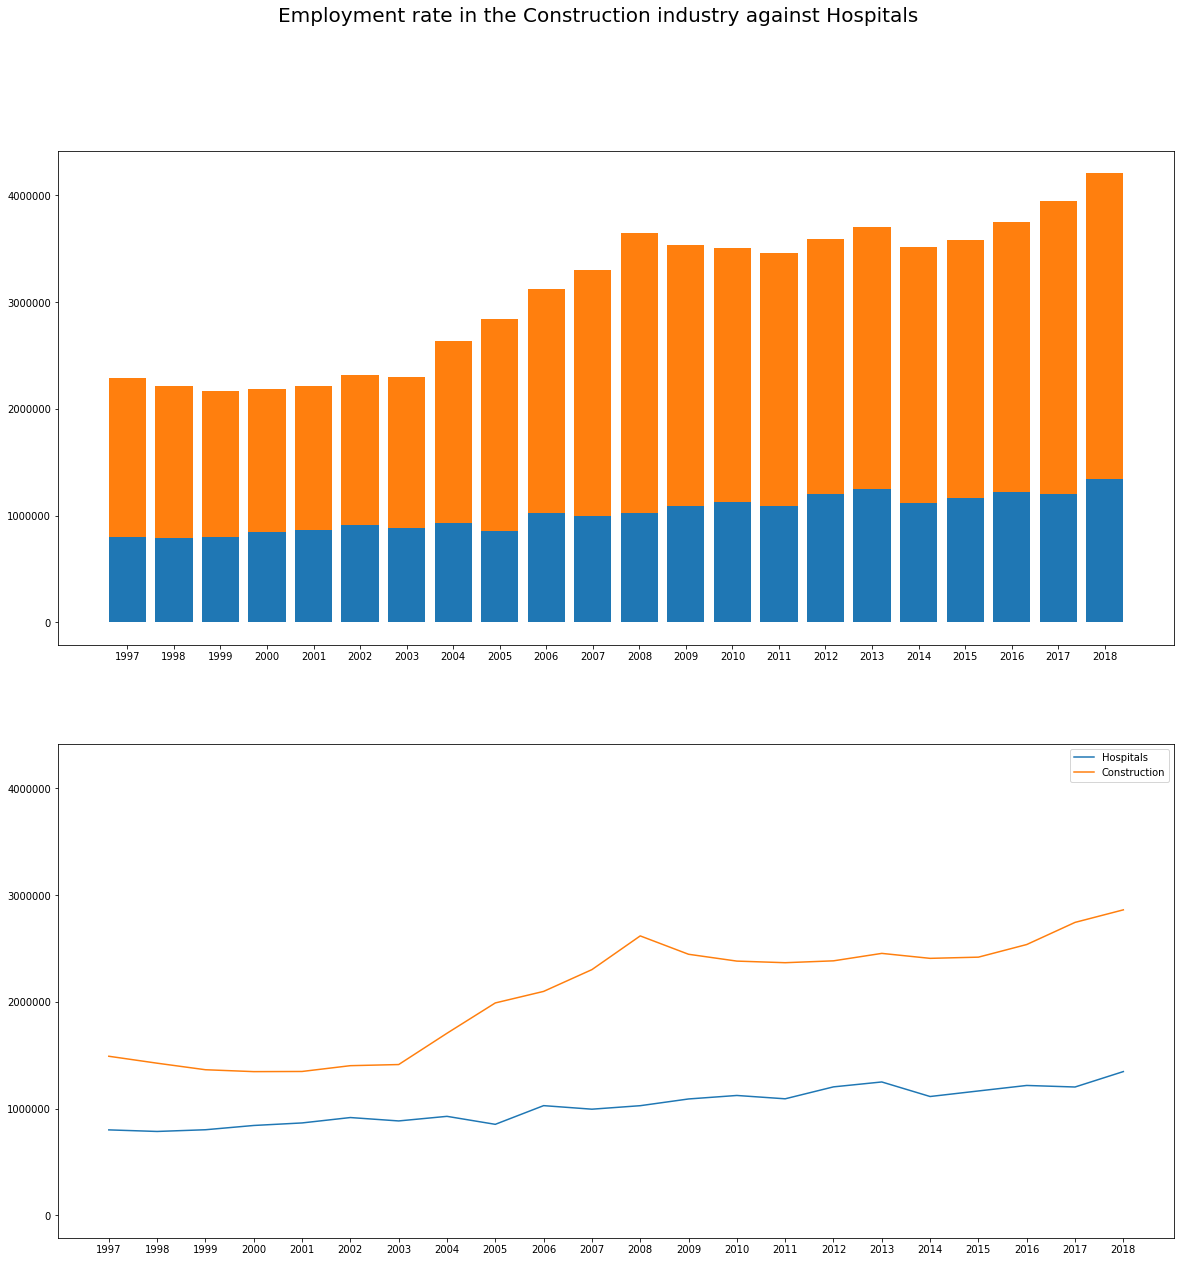

In [30]:
fig7, ax7 = plt.subplots(2, 1, sharey=True)
fig7.set_size_inches([20,20])

ax7[0].bar(hospitals_employment_by_year.index, hospitals_employment_by_year.values, label="Hospitals")
ax7[0].bar(construction_employment_by_year.index, construction_employment_by_year.values, label="Construction", bottom=hospitals_employment_by_year.values)
ax7[0].set_xticks(range(1997, 2019))

ax7[1].plot(hospitals_employment_by_year.index, hospitals_employment_by_year.values, label="Hospitals")
ax7[1].plot(construction_employment_by_year.index, construction_employment_by_year.values, label="Construction")
ax7[1].set_xticks(range(1997, 2019))

fig7.suptitle("Employment rate in the Construction industry against Hospitals", fontsize=20)

plt.legend()
plt.show()

**The bar plots show us that employments in Hospitals experienced relatively small increase compared to the employment in the Construction industry. The line graph shows the upward trend of employments in the Construction industry, while there is slight increase in employments in Hospitals over the years**